In [120]:
# data manipulation 
import pandas as pd 

In [121]:
#get data from csv file
busia_df = pd.read_csv('Data/BusiaTravel.csv') 
busia_df.tail()

,Travel_Route,Year,Year_text,Visitors_on_Holiday,Visitors_on_Business,Visitors_in_Transit,Other_Visitors,Quater,Results_Status,OBJECTID
203,Departures,12/31/2013 12:00:00 AM,2013,323300,53000,23200,32600,Q4,Actual,203
204,Departures,12/31/1991 12:00:00 AM,1991,142800,16400,12600,1100,Q4,Actual,204
205,Departures,12/31/1992 12:00:00 AM,1992,61800,16300,9400,1300,Q4,Actual,205
206,Departures,12/31/1993 12:00:00 AM,1993,113600,30000,17300,2400,Q4,Actual,206
207,Departures,12/31/1994 12:00:00 AM,1994,123400,32600,18800,2600,Q4,Actual,207


In [122]:
#get data types of the columns
busia_df.dtypes 

Travel_Route            object
Year                    object
Year_text               object
Visitors_on_Holiday      int64
Visitors_on_Business     int64
Visitors_in_Transit      int64
Other_Visitors           int64
Quater                  object
Results_Status          object
OBJECTID                 int64
dtype: object

In [123]:
#change to date time data type
busia_df['Year'] = pd.to_datetime(busia_df['Year'])  

#Drop redundant columns or useless columns
busia_df.drop(columns=['Year_text', 'Results_Status','OBJECTID'],inplace=True) 
busia_df.head()

,Travel_Route,Year,Visitors_on_Holiday,Visitors_on_Business,Visitors_in_Transit,Other_Visitors,Quater
0,Arrivals,2005-03-31,264600,516000,22200,37600,Q1
1,Arrivals,1991-06-30,149400,16600,5100,2400,Q2
2,Arrivals,1991-09-30,215900,23100,13200,4100,Q3
3,Arrivals,1991-12-31,158400,20000,12500,7900,Q4
4,Arrivals,1992-03-31,155400,39100,19200,5500,Q1


## Visualization

In [124]:
#get plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#set figure size
plt.rcParams['figure.figsize'] = [20, 10]

#show in the notebook
#%matplotlib notebook 

#Set the plots look to seaborn
sns.set() 

### Numerical Features

### Line Graphs
A plot used to track the change in value over time. This naturally makes it suitable for time series data.


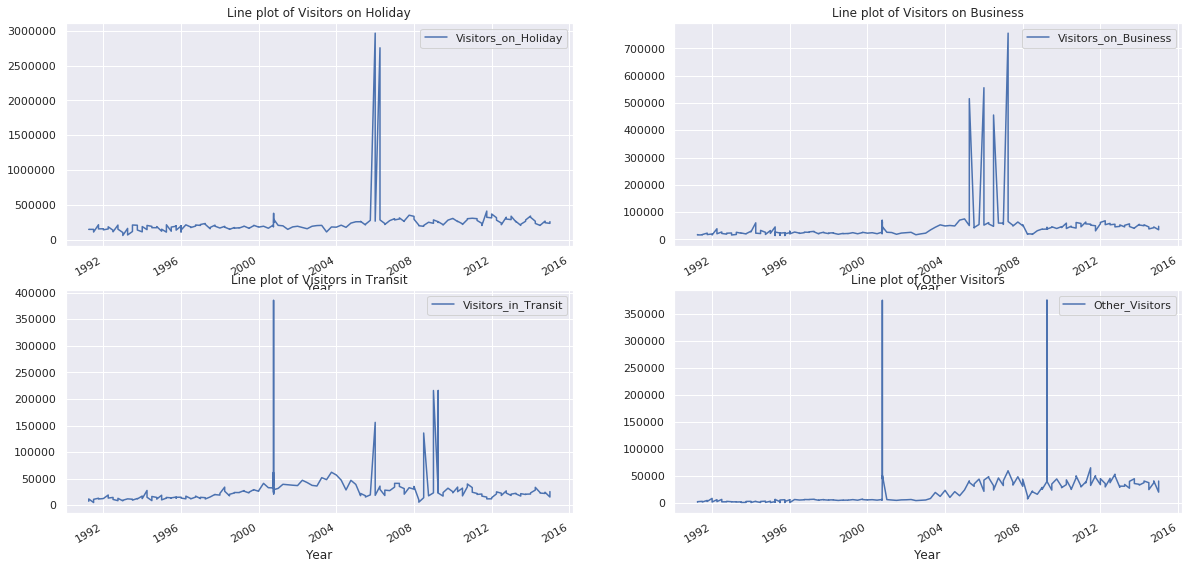

In [125]:
#Create different subplots
fig, axes = plt.subplots(nrows=2, ncols=2)

busia_df.plot(x='Year',y='Visitors_on_Holiday',ax=axes[0,0],title='Line plot of Visitors on Holiday')
busia_df.plot(x='Year',y='Visitors_on_Business',ax=axes[0,1],title='Line plot of Visitors on Business')
busia_df.plot(x='Year',y='Visitors_in_Transit',ax=axes[1,0],title='Line plot of Visitors in Transit')
busia_df.plot(x='Year',y='Other_Visitors',ax=axes[1,1],title='Line plot of Other Visitors')

### Area Chart
Similar to line plot but then the area and under the curve is filled. It is used to visualize trend rather than values.

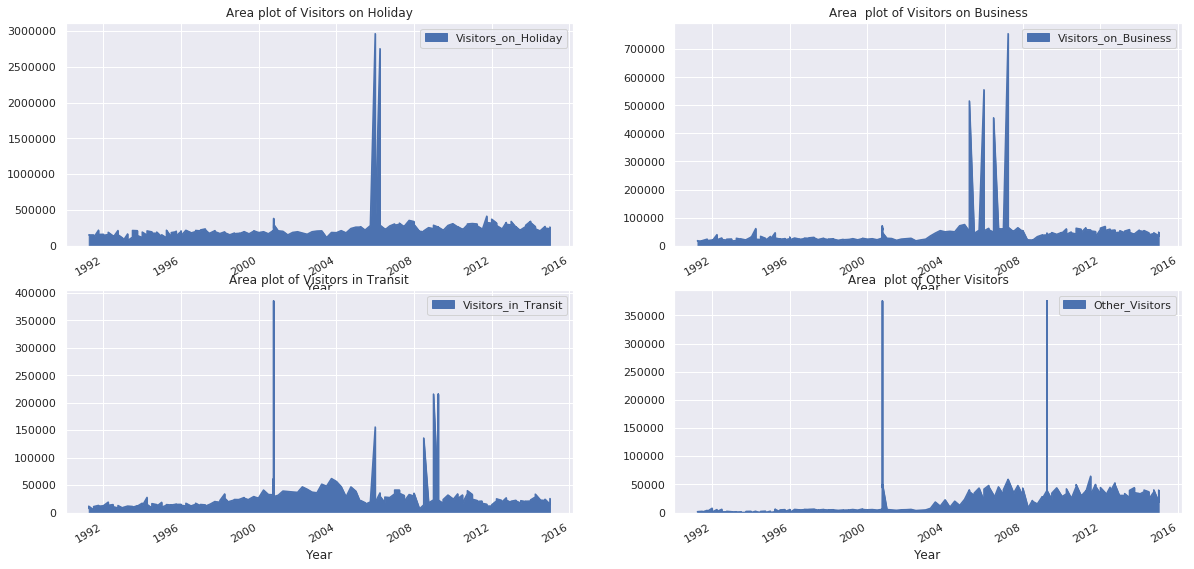

In [126]:
fig, axes = plt.subplots(nrows=2, ncols=2)
busia_df.plot(x='Year',y='Visitors_on_Holiday',ax=axes[0,0],kind='area',title='Area plot of Visitors on Holiday')
busia_df.plot(x='Year',y='Visitors_on_Business',ax=axes[0,1],kind='area',title='Area  plot of Visitors on Business')
busia_df.plot(x='Year',y='Visitors_in_Transit',ax=axes[1,0],kind='area',title='Area plot of Visitors in Transit')
busia_df.plot(x='Year',y='Other_Visitors',ax=axes[1,1],kind='area',title='Area  plot of Other Visitors')

### Stacked Area charts
This an area chart that shows how much each part contributes to the total.

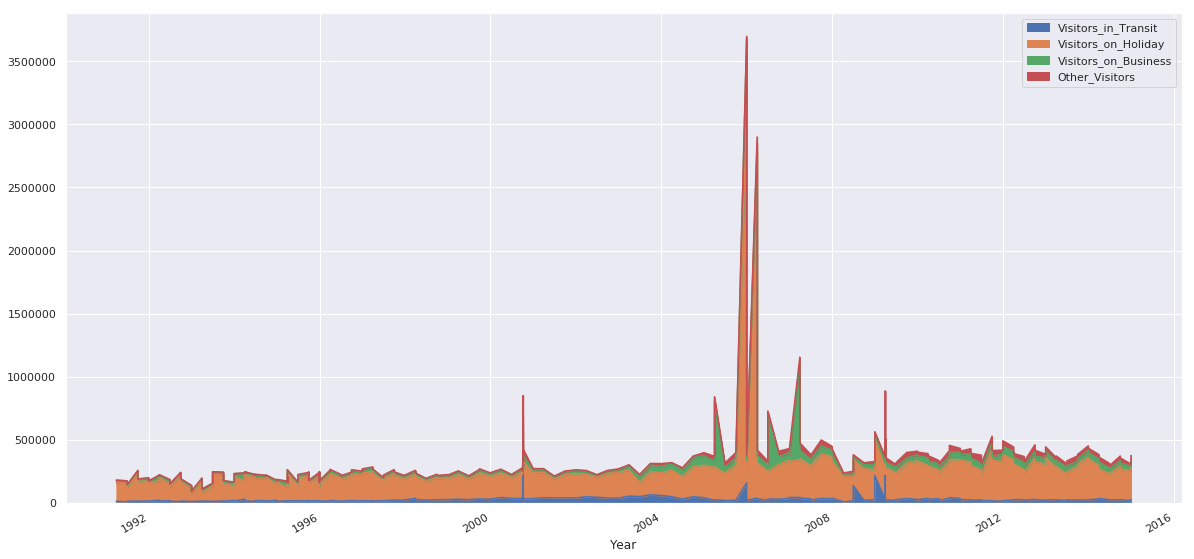

In [127]:
busia_df.plot(x='Year',y=['Visitors_in_Transit','Visitors_on_Holiday','Visitors_on_Business','Other_Visitors'],kind='area')

### Scatter Plot
A plot that checks for relationships between variables.


In [128]:
busia_Visitors_df = busia_df.drop(columns=['Quater','Travel_Route'])

Arrivals = busia_Visitors_df[busia_df.Travel_Route=='Arrivals'].groupby('Year').mean()
Departures = busia_Visitors_df[busia_df.Travel_Route=='Departures'].groupby('Year').mean()

In [129]:
Departures.head()

,Visitors_on_Holiday,Visitors_on_Business,Visitors_in_Transit,Other_Visitors
Year,,,,
1991-03-31,149300,16400,11800,1800
1991-06-30,111200,17900,11100,1200
1991-09-30,156200,17800,11700,2200
1991-12-31,142800,16400,12600,1100
1992-03-31,186000,20700,13500,1900


In [130]:
Arrivals.head()

,Visitors_on_Holiday,Visitors_on_Business,Visitors_in_Transit,Other_Visitors
Year,,,,
1991-03-31,149600,17900,7500,1000
1991-06-30,149400,16600,5100,2400
1991-09-30,215900,23100,13200,4100
1991-12-31,158400,20000,12500,7900
1992-03-31,155400,39100,19200,5500


<Figure size 1440x720 with 0 Axes>

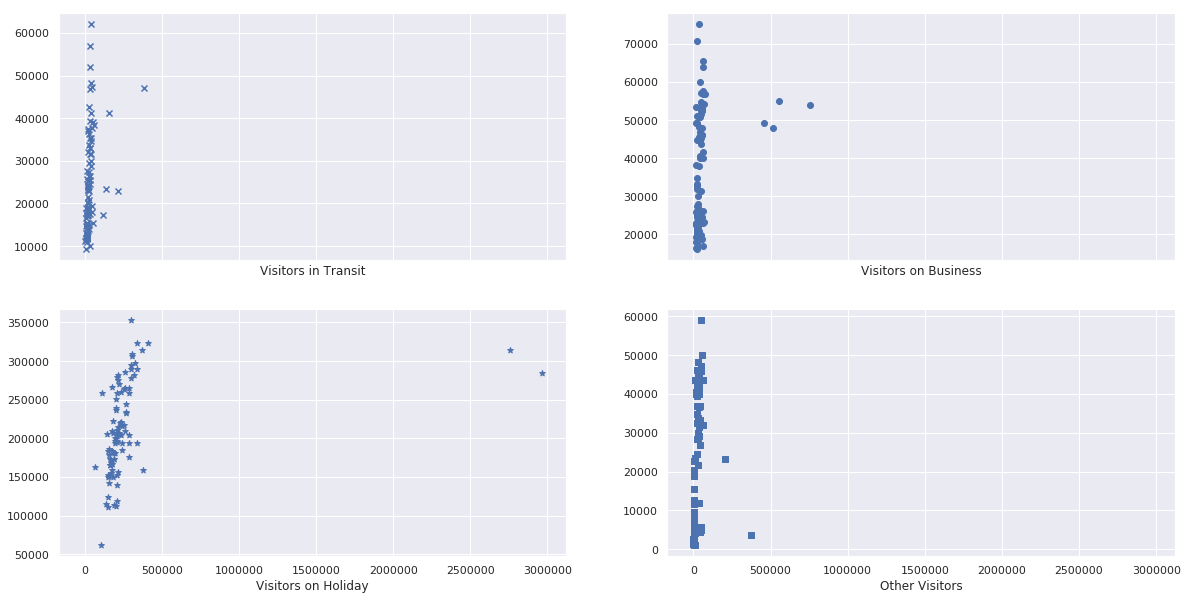

In [131]:
import matplotlib.pyplot as plt
import numpy as np

#Plotting Arrivals vs Departures

f = plt.figure()    
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True)

sc = axes[0][0].scatter(x=Arrivals.Visitors_in_Transit,y=Departures.Visitors_in_Transit, marker = "x")
axes[0][0].set_xlabel('Visitors in Transit', labelpad = 5)

axes[0][1].scatter(x=Arrivals.Visitors_on_Business,y=Departures.Visitors_on_Business, marker = 'o')
axes[0][1].set_xlabel('Visitors on Business', labelpad = 5)

axes[1][0].scatter(x=Arrivals.Visitors_on_Holiday,y=Departures.Visitors_on_Holiday, marker = '*')
axes[1][0].set_xlabel('Visitors on Holiday')

axes[1][1].scatter(x=Arrivals.Other_Visitors,y=Departures.Other_Visitors, marker = 's')
axes[1][1].set_xlabel('Other Visitors')





plt.show()


### Categorical with Numerical

### Bar plots 
This is a plot that shows categorical data with their values.


In [132]:
#group data by year and travel route
busia_sum_df =busia_df.groupby([busia_df.Year.dt.year,busia_df.Travel_Route]).sum()
busia_sum_df = busia_sum_df.reset_index(level='Travel_Route')
busia_sum_df.head()

,Travel_Route,Visitors_on_Holiday,Visitors_on_Business,Visitors_in_Transit,Other_Visitors
Year,,,,,
1991,Arrivals,673300,77600,38300,15400
1991,Departures,559500,68500,47200,6300
1992,Arrivals,606700,109300,50800,14700
1992,Departures,514800,81700,46800,7100
1993,Arrivals,679800,97600,46800,2000


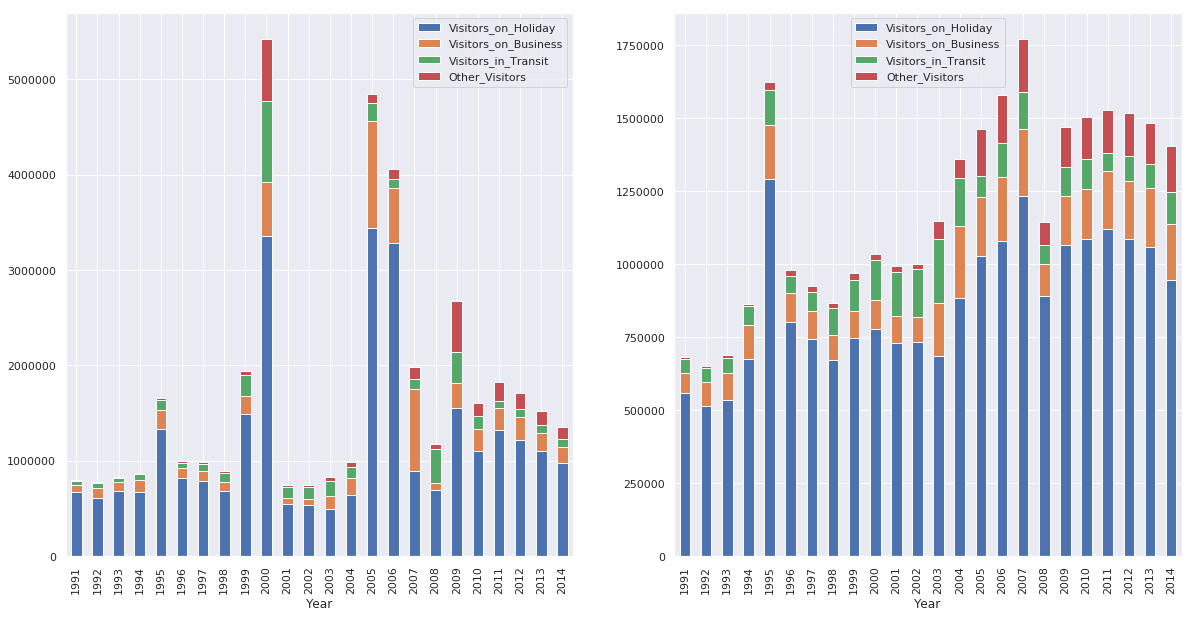

In [133]:
#plot bar charts
fig, axes = plt.subplots(nrows=1, ncols=2)
busia_sum_df[busia_sum_df['Travel_Route']=='Arrivals'].plot.bar(stacked=True,ax=axes[0])
busia_sum_df[busia_sum_df['Travel_Route']=='Departures'].plot.bar(stacked=True,ax=axes[1])


### Histograms
This is a bar plot of frequency distributions whose width is equal to class interval



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f21a54257b8>,
      dtype=object)

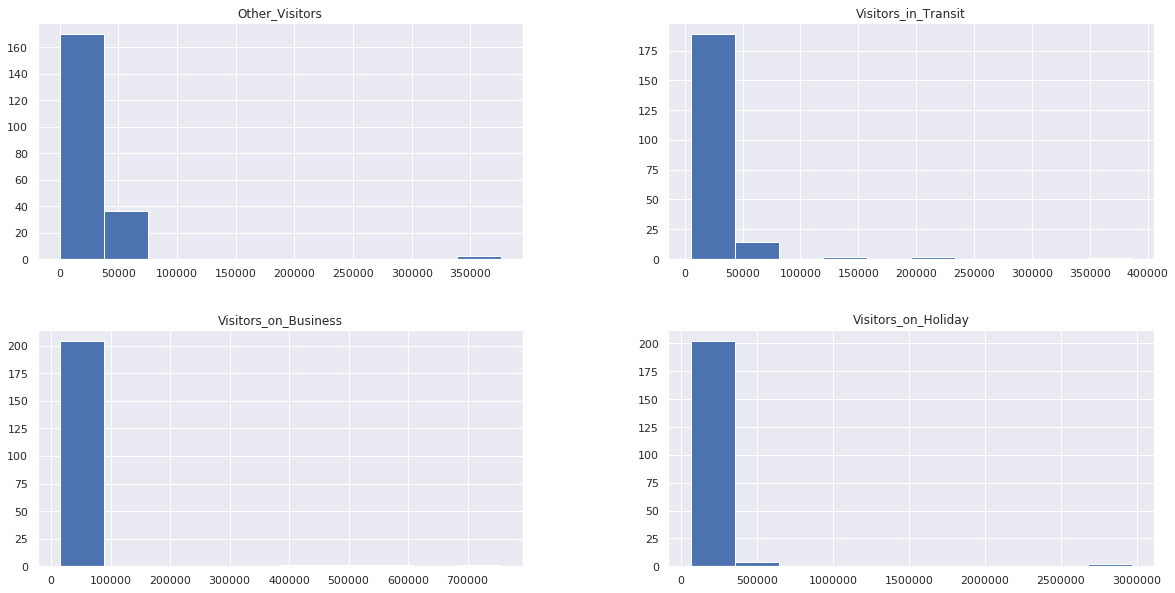

In [134]:
busia_df.hist()

## Categorical Features

### Pie Chart
A chart used to show proportions of categorical quantities


In [135]:
busia_quarter_df = busia_df.groupby(['Quater']).sum()
busia_quarter_df

,Visitors_on_Holiday,Visitors_on_Business,Visitors_in_Transit,Other_Visitors
Quater,,,,
Q1,13790300,3103000,1540900,1271300
Q2,9501900,2126500,1246900,841500
Q3,12162000,1873700,1685400,1409200
Q4,14416800,2453300,1595000,873200


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f219f8f95c0>,
      dtype=object)

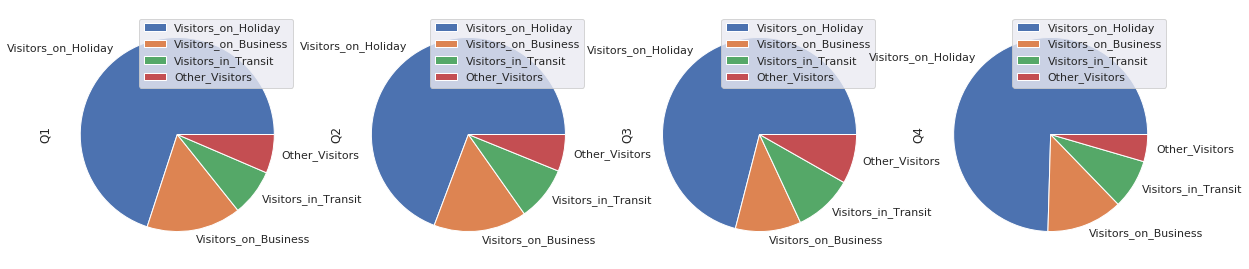

In [136]:
busia_quarter_df.T.plot.pie(subplots=True)


### Mosaic chart
A chart that shows the relationship among two or more categorical variables

In [137]:
#convert continuous values to categorical
busia_df.Visitors_on_Holiday = pd.qcut(busia_df.Visitors_on_Holiday.values,3,labels=["low", "medium", "high"])
busia_df.Visitors_on_Business = pd.qcut(busia_df.Visitors_on_Business,3,labels=["low", "medium", "high"])

busia_df.Visitors_in_Transit =  pd.qcut(busia_df.Visitors_in_Transit.values,3,labels=["low", "medium", "high"])
busia_df.Other_Visitors = pd.qcut(busia_df.Other_Visitors,3, labels=["low", "medium", "high"])

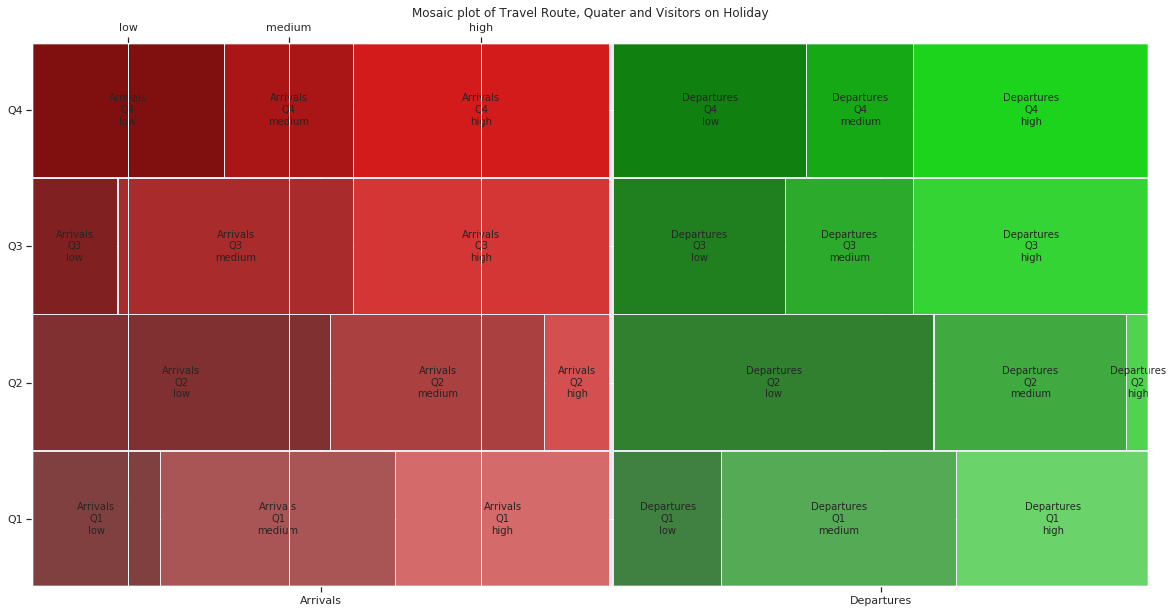

In [138]:
from statsmodels.graphics.mosaicplot import mosaic
mosaic_plot=mosaic(busia_df, ['Travel_Route','Quater','Visitors_on_Holiday'], title='Mosaic plot of Travel Route, Quater and Visitors on Holiday')

### High Dimensional features

Visualing more than 3 features

In [139]:
#set original data
busia_df = pd.read_csv('Data/BusiaTravel.csv')
busia_df['Year'] = pd.to_datetime(busia_df['Year'])
busia_df.drop(columns=['Year_text', 'Results_Status','OBJECTID'],inplace=True)
busia_df.head()

,Travel_Route,Year,Visitors_on_Holiday,Visitors_on_Business,Visitors_in_Transit,Other_Visitors,Quater
0,Arrivals,2005-03-31,264600,516000,22200,37600,Q1
1,Arrivals,1991-06-30,149400,16600,5100,2400,Q2
2,Arrivals,1991-09-30,215900,23100,13200,4100,Q3
3,Arrivals,1991-12-31,158400,20000,12500,7900,Q4
4,Arrivals,1992-03-31,155400,39100,19200,5500,Q1


### Trellis
A series of plots for showing multivariate data


/home/sylvia/face/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


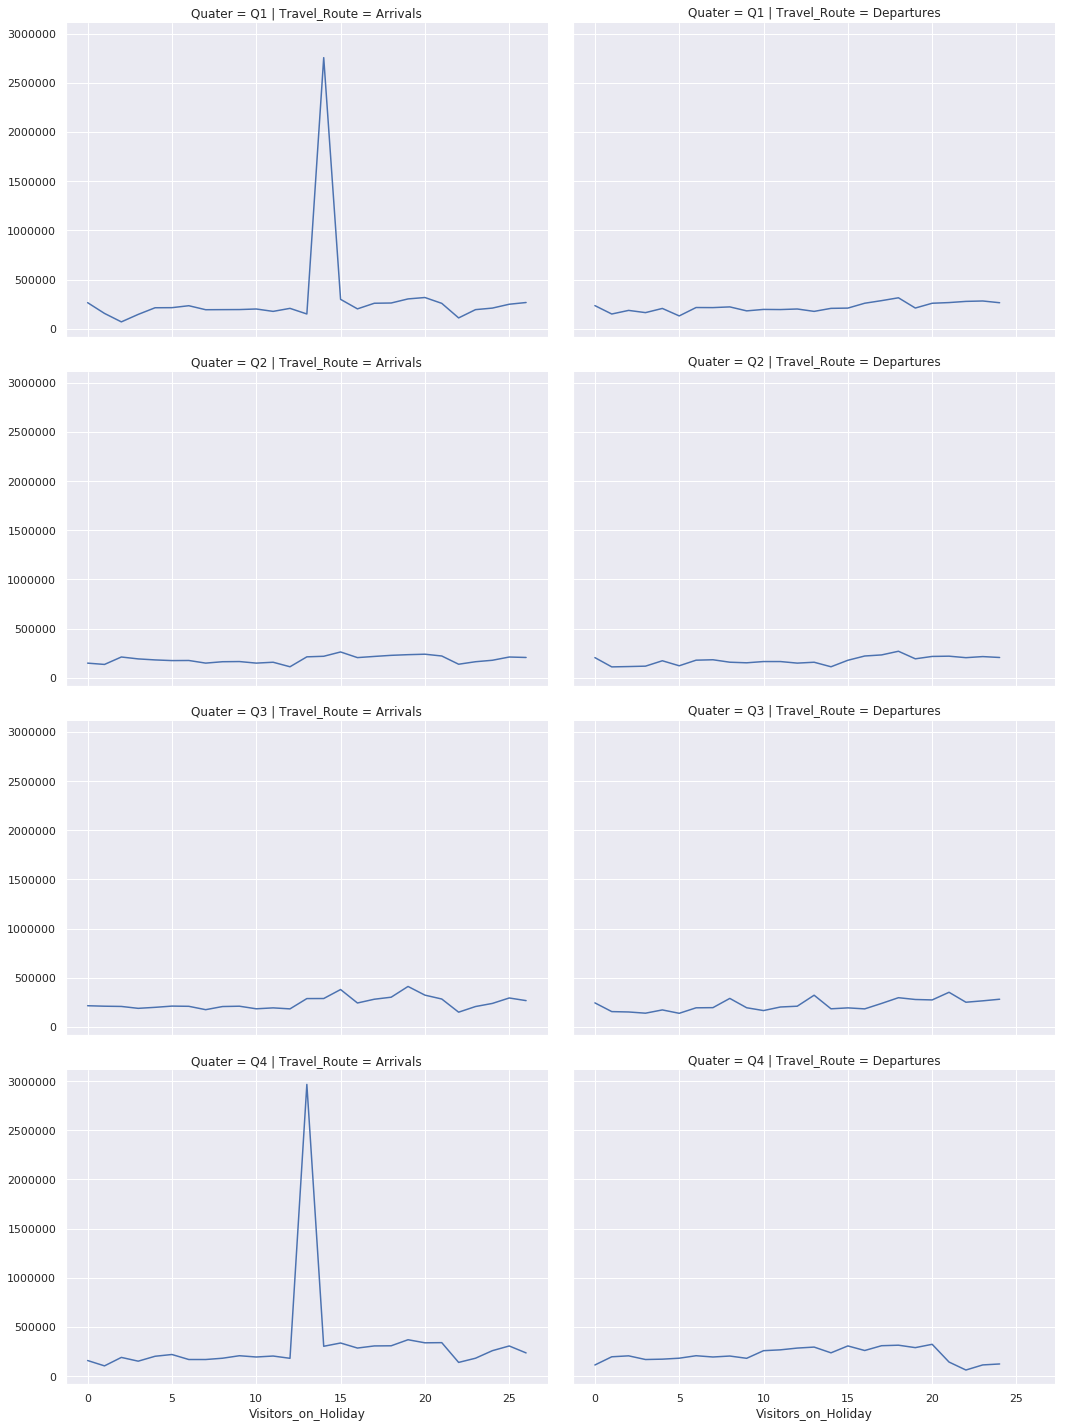

In [148]:
#set figure size
plt.rcParams['figure.figsize'] = (20, 10) 

g = sns.FacetGrid(busia_df, col="Travel_Route",  row="Quater",size=5, aspect=1.5)
g = g.map(plt.plot, "Visitors_on_Holiday")




### Pairplot
Plots relationships in a dataset

/home/sylvia/face/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


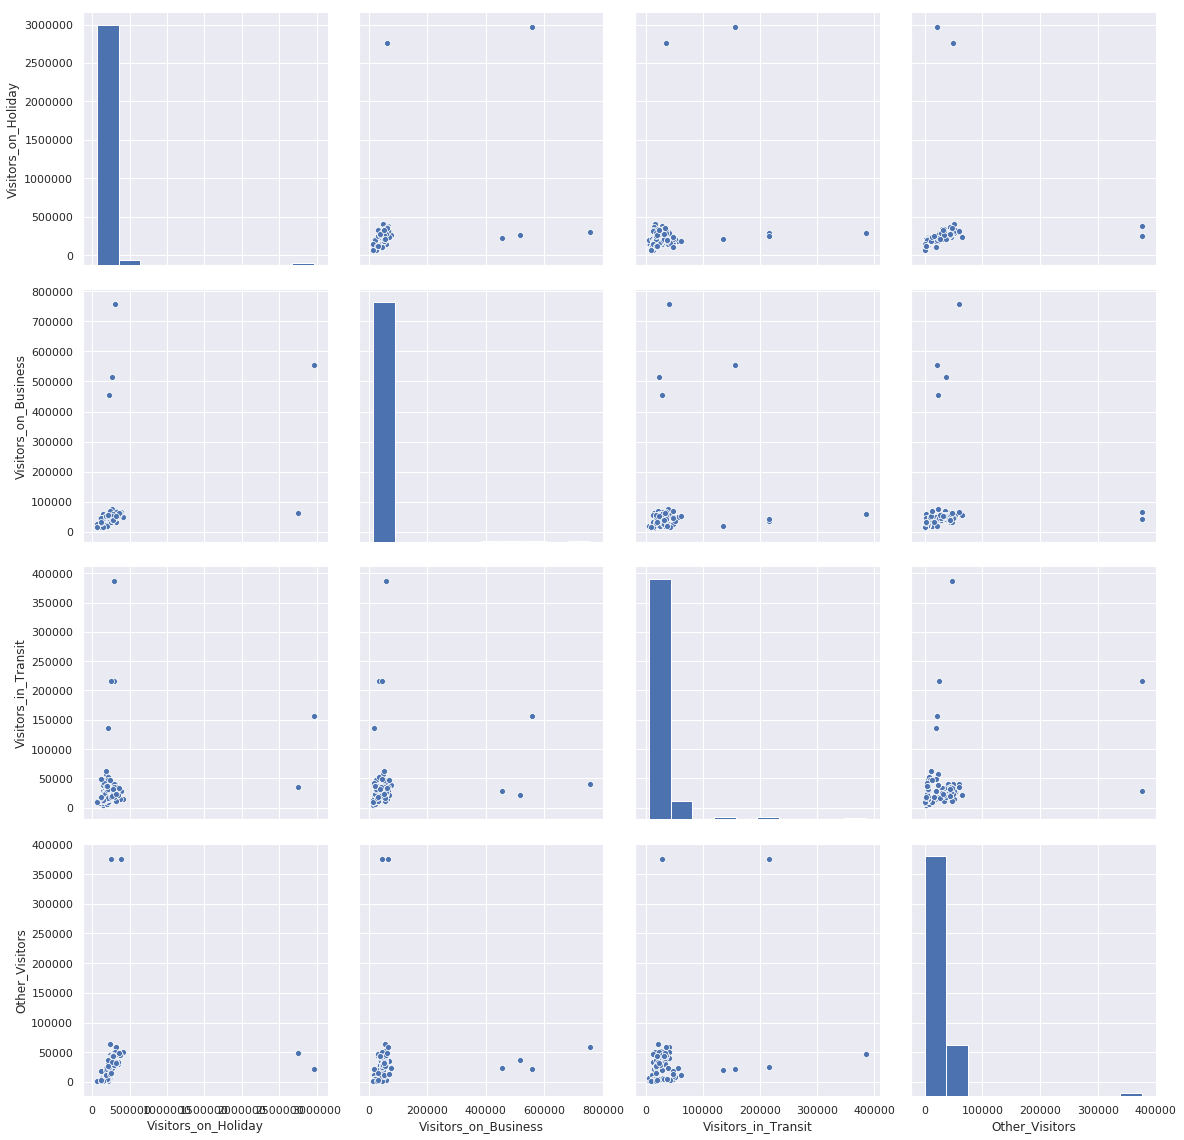

In [152]:
sns.pairplot(busia_df,size=4, aspect=1)
